### 导入模块

In [21]:
# -*- coding: utf-8 -*-
from tensorflow.keras.models import load_model
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import sqlite3
import json
import os
import cv2

### 建立函数：利用生成器生成图片

In [57]:
generator = load_model('Static/generator.h5')#载入生成器模型
def createClearImg(imgPath):
    '''输入图片路径，输出64x64的由nearest生成图、SRGAN生成图、原图共3张'''
    originImg = cv2.imdecode(np.fromfile(imgPath,dtype=np.uint8),-1)#读取图片
    originImg = cv2.resize(originImg,(64,64))#改变尺寸
    lowImg = cv2.resize(originImg,(32,32))#改变尺寸
    lowImg = (lowImg/255 -0.5)*2#进行归一化
    #生成图片
    srganImg = generator.predict(lowImg.reshape(-1,32,32,3)).reshape(64,64,3)
    nearestImg = cv2.resize(lowImg,(64,64),Image.NEAREST)
    #归一化还原
    srganImg = (srganImg/2 + 0.5)*255
    nearestImg = (nearestImg/2 + 0.5)*255
    #转换类型
    srganImg = np.array(srganImg).astype(np.int32)
    nearestImg = np.array(nearestImg).astype(np.int32)
    return {'nearest':nearestImg,'srgan':srganImg,'origin':originImg}
    

### 测试，展示图片，左边是nearest，中间是SRGAN，右边是原图

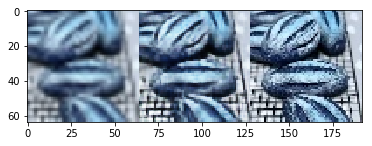

In [70]:
imgs = createClearImg('Static/Image/0a0dbf6f8cbf14618e174387c52cbd3e.jpg')
combine = np.concatenate((imgs['nearest'],imgs['srgan'],imgs['origin']), axis=1)#联合图片
plt.imshow(combine)